<a href="https://colab.research.google.com/github/hafizapatel04-bit/week2-SOLAR-POWER-PREDICTION/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
os.listdir()


['.config', 'sample_data']

In [4]:
from google.colab import files
files.upload()


Saving Plant_1_Weather_Sensor_Data (1).csv.txt to Plant_1_Weather_Sensor_Data (1).csv.txt


{'Plant_1_Weather_Sensor_Data (1).csv.txt': b'DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION\n2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316133333333,22.8575074,0.0\n2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.08458866666667,22.761667866666663,0.0\n2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935752600000004,22.59230553333333,0.0\n2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.8461304,22.36085213333333,0.0\n2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525357142858,22.165422642857145,0.0\n2020-05-15 01:15:00,4135001,HmiyD2TTLFNqkNe,24.5360922,21.968570866666667,0.0\n2020-05-15 01:30:00,4135001,HmiyD2TTLFNqkNe,24.638673866666664,22.352925666666668,0.0\n2020-05-15 01:45:00,4135001,HmiyD2TTLFNqkNe,24.87302233333333,23.1609192,0.0\n2020-05-15 02:00:00,4135001,HmiyD2TTLFNqkNe,24.936930466666663,23.026113,0.0\n2020-05-15 02:15:00,4135001,HmiyD2TTLFNqkNe,25.0122476,23.343229266666665,0.0\n2020-05-15 02:30:00,4135001,HmiyD2TTLFNqkNe,25.00514933

In [5]:
import os
os.listdir()


['.config', 'Plant_1_Weather_Sensor_Data (1).csv.txt', 'sample_data']

In [7]:
import os
os.rename("Plant_1_Weather_Sensor_Data (1).csv.txt", "Plant_1_Weather_Sensor_Data.csv")


In [8]:
import pandas as pd

df1 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")
print(df1.head())
print(df1.shape)


             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0  
(3182, 6)


In [9]:

df1.head()
df1.shape


(3182, 6)

In [12]:

from google.colab import files
uploaded = files.upload()


Saving Cleaned_Plant_Generation_Data (2).csv to Cleaned_Plant_Generation_Data (2).csv


In [14]:
import os
os.listdir()


['.config',
 'Plant_1_Weather_Sensor_Data.csv',
 'Cleaned_Plant_Generation_Data (2).csv',
 'sample_data']

In [15]:
import pandas as pd

df_weather = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")
df_gen = pd.read_csv("Cleaned_Plant_Generation_Data (2).csv")


In [18]:
df_weather['DATE_TIME'] = pd.to_datetime(df_weather['DATE_TIME'], dayfirst=True)
df_gen['DATE_TIME'] = pd.to_datetime(df_gen['DATE_TIME'], dayfirst=True)

df = pd.merge(df_gen, df_weather, on=["DATE_TIME"], how="inner")
print(df.shape)


(68774, 30)


In [19]:
df = df.drop(['PLANT_ID_x', 'PLANT_ID_y'], axis=1, errors='ignore')
df = df.drop(['SOURCE_KEY'], axis=1, errors='ignore')


In [20]:
df = df[df['AC_POWER'] > 0]


In [21]:
df['hour'] = df['DATE_TIME'].dt.hour
df['day'] = df['DATE_TIME'].dt.day
df['month'] = df['DATE_TIME'].dt.month


In [22]:
df = df.drop('DATE_TIME', axis=1)


In [23]:
X = df.drop('AC_POWER', axis=1)
y = df['AC_POWER']


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
df = df.drop(columns=['SOURCE_KEY_x', 'SOURCE_KEY_y'], errors='ignore')


In [27]:
df.dtypes


,0
DC_POWER,float64
AC_POWER,float64
DAILY_YIELD,float64
TOTAL_YIELD,float64
Unnamed: 7,float64
Unnamed: 8,float64
Unnamed: 9,float64
Unnamed: 10,float64
Unnamed: 11,float64
Unnamed: 12,float64


In [28]:
obj_cols = df.select_dtypes(include='object').columns
print(obj_cols)


Index([], dtype='object')


In [29]:
df = df.drop(columns=['DATE_TIME'], errors='ignore')


In [30]:
X = df.drop(columns=['DC_POWER'])
y = df['DC_POWER']


In [33]:
print(df.columns)



Index(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'hour',
       'day', 'month'],
      dtype='object')


In [34]:
# Choose target column
y = df['AC_POWER']  # or 'DC_POWER' depending on what you want to predict

# Drop non-feature columns
X = df.drop(columns=['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD',
                     'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10',
                     'Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14',
                     'Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18',
                     'Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22',
                     'Unnamed: 23','Unnamed: 24'])


In [35]:
print(X.head())
print(X.dtypes)


     AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  hour  day  month
510            24.088446           22.206757     0.005887     6   15      5
511            24.088446           22.206757     0.005887     6   15      5
512            24.088446           22.206757     0.005887     6   15      5
513            24.088446           22.206757     0.005887     6   15      5
514            24.088446           22.206757     0.005887     6   15      5
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
hour                     int32
day                      int32
month                    int32
dtype: object


In [36]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize XGBoost regressor
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 53.44
R²: 0.98


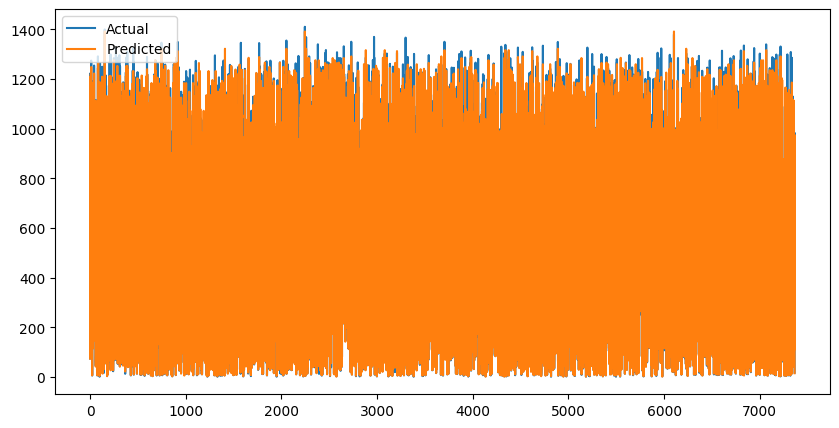

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


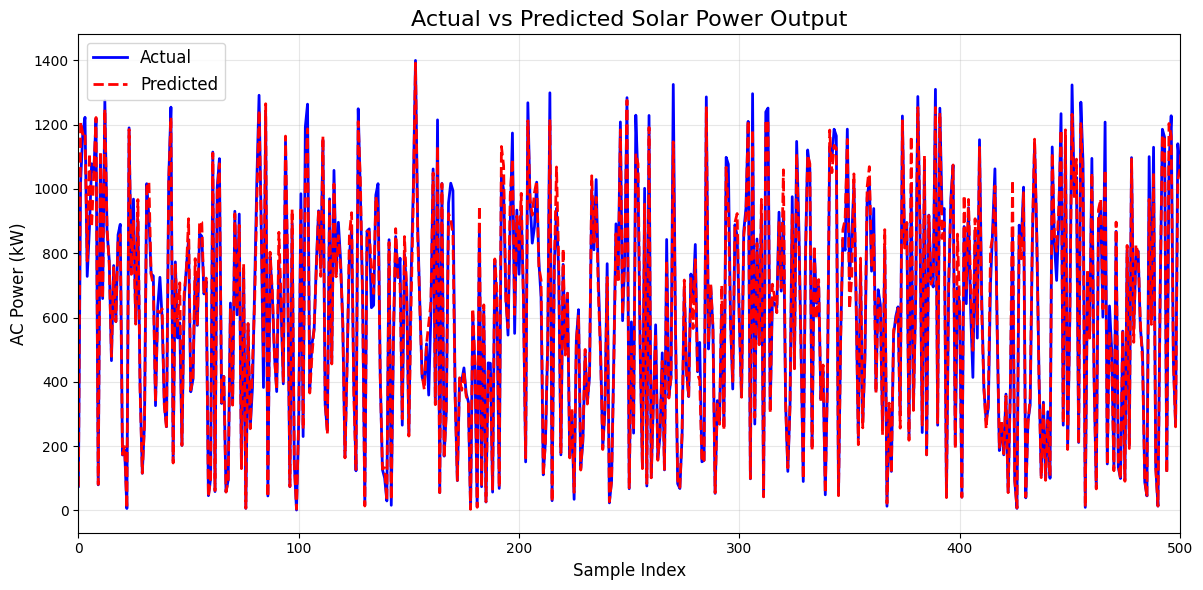

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))

# Plot actual vs predicted
plt.plot(y_test.values, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted', color='red', linestyle='--', linewidth=2)

# Add title and labels
plt.title('Actual vs Predicted Solar Power Output', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('AC Power (kW)', fontsize=12)

# Grid, legend, and tight layout
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

# Optional: zoom on first 500 samples for clarity
plt.xlim(0, 500)

plt.show()
